In [2]:
import pandas as pd
# read a metadata 
metadata_path = 'C:/Users/kingGester/Desktop/data/raw/metadata.csv'
meta=pd.read_csv(metadata_path)
meta.head()

,uid,filename,test_id,sn,test_pressure,test_mode,vl1,vl2,vl3,anomalous,anomaly_code,cumulated_throughput,cumulated_on_time,cumulated_pulses
0,1,00001_001_SN01_24bars_ssf.csv,1,1,24.0,ssf,True,True,False,False,0.0,0.000000,0.000000,0.0
1,2,00002_002_SN01_21bars_ssf.csv,2,1,21.0,ssf,True,True,False,False,0.0,0.451717,0.083333,1.0
2,3,00003_003_SN01_18bars_ssf.csv,3,1,18.0,ssf,True,True,False,False,0.0,0.842268,0.166667,2.0
3,4,00004_004_SN01_15bars_ssf.csv,4,1,15.0,ssf,True,True,False,False,0.0,1.174725,0.250000,3.0
4,5,00005_005_SN01_12bars_ssf.csv,5,1,12.0,ssf,True,True,False,False,0.0,1.452586,0.333333,4.0


In [3]:

import os


In [4]:
meta.shape
meta.describe()

,uid,test_id,sn,test_pressure,anomaly_code,cumulated_throughput,cumulated_on_time,cumulated_pulses
count,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000
mean,1306.500000,55.969372,12.571210,14.510720,2.258423,11.851748,3.505646,10720.538668
std,754.163775,32.446282,7.011173,6.229084,7.121008,6.313155,2.085559,6818.366938
min,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,653.750000,28.000000,6.000000,9.000000,0.000000,6.100596,1.717664,5424.000000
50%,1306.500000,56.000000,13.000000,15.000000,0.000000,12.963043,3.383783,9742.000000
75%,1959.250000,84.000000,19.000000,21.000000,0.000000,17.370824,5.494214,16663.250000
max,2612.000000,112.000000,24.000000,24.000000,31.000000,22.538097,7.368264,23653.000000


In [5]:
# list columns
meta.columns.tolist()

['uid',
 'filename',
 'test_id',
 'sn',
 'test_pressure',
 'test_mode',
 'vl1',
 'vl2',
 'vl3',
 'anomalous',
 'anomaly_code',
 'cumulated_throughput',
 'cumulated_on_time',
 'cumulated_pulses']

In [6]:
meta['sn'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [7]:
# insert columns sn_str
meta['sn_str'] = meta['sn'].apply(lambda x: f"SN{str(x).zfill(2)}")

In [8]:
meta[meta['sn_str'] == 'SN01']


,uid,filename,test_id,sn,test_pressure,test_mode,vl1,vl2,vl3,anomalous,anomaly_code,cumulated_throughput,cumulated_on_time,cumulated_pulses,sn_str
0,1,00001_001_SN01_24bars_ssf.csv,1,1,24.0,ssf,True,True,False,False,0.0,0.000000,0.000000,0.0,SN01
1,2,00002_002_SN01_21bars_ssf.csv,2,1,21.0,ssf,True,True,False,False,0.0,0.451717,0.083333,1.0,SN01
2,3,00003_003_SN01_18bars_ssf.csv,3,1,18.0,ssf,True,True,False,False,0.0,0.842268,0.166667,2.0,SN01
3,4,00004_004_SN01_15bars_ssf.csv,4,1,15.0,ssf,True,True,False,False,0.0,1.174725,0.250000,3.0,SN01
4,5,00005_005_SN01_12bars_ssf.csv,5,1,12.0,ssf,True,True,False,False,0.0,1.452586,0.333333,4.0,SN01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,108,00108_108_SN01_5bars_onmod.csv,108,1,5.0,onmod,True,False,False,False,0.0,19.914000,6.743203,20860.0,SN01
108,109,00109_109_SN01_5bars_offmod.csv,109,1,5.0,offmod,True,True,False,False,0.0,19.938334,6.765689,21660.0,SN01
109,110,00110_110_SN01_5bars_random_short.csv,110,1,5.0,random_short,True,True,False,False,0.0,20.171086,6.976800,22460.0,SN01
110,111,00111_111_SN01_5bars_random_long.csv,111,1,5.0,random_long,True,True,False,False,0.0,20.213813,7.016875,22760.0,SN01


In [9]:
meta[['uid', 'sn_str', 'test_id', 'filename']].head()

,uid,sn_str,test_id,filename
0,1,SN01,1,00001_001_SN01_24bars_ssf.csv
1,2,SN01,2,00002_002_SN01_21bars_ssf.csv
2,3,SN01,3,00003_003_SN01_18bars_ssf.csv
3,4,SN01,4,00004_004_SN01_15bars_ssf.csv
4,5,SN01,5,00005_005_SN01_12bars_ssf.csv


In [12]:
meta.head()

,uid,filename,test_id,sn,test_pressure,test_mode,vl1,vl2,vl3,anomalous,anomaly_code,cumulated_throughput,cumulated_on_time,cumulated_pulses,sn_str,full_path
0,1,00001_001_SN01_24bars_ssf.csv,1,1,24.0,ssf,True,True,False,False,0.0,0.000000,0.000000,0.0,SN01,C:/Users/kingGester/Desktop/data/raw/train/000...
1,2,00002_002_SN01_21bars_ssf.csv,2,1,21.0,ssf,True,True,False,False,0.0,0.451717,0.083333,1.0,SN01,C:/Users/kingGester/Desktop/data/raw/train/000...
2,3,00003_003_SN01_18bars_ssf.csv,3,1,18.0,ssf,True,True,False,False,0.0,0.842268,0.166667,2.0,SN01,C:/Users/kingGester/Desktop/data/raw/train/000...
3,4,00004_004_SN01_15bars_ssf.csv,4,1,15.0,ssf,True,True,False,False,0.0,1.174725,0.250000,3.0,SN01,C:/Users/kingGester/Desktop/data/raw/train/000...
4,5,00005_005_SN01_12bars_ssf.csv,5,1,12.0,ssf,True,True,False,False,0.0,1.452586,0.333333,4.0,SN01,C:/Users/kingGester/Desktop/data/raw/train/000...


In [ ]:
def get_full_path(row):
    """ Each row gets a full file path stored in meta['full_path'],
    pointing to either the train or test directory based on the 'sn' value
    
    Returns:
        string: full file path
    """

    folder = 'train' if row['sn'] <= 12 else 'test'
    return f"C:/Users/kingGester/Desktop/data/raw/{folder}/{row['filename']}"

meta['full_path']=meta.apply(get_full_path,axis=1)
meta[['sn_str','test_id','full_path']].head()


,sn_str,test_id,full_path
0,SN01,1,C:/Users/kingGester/Desktop/data/raw/train/000...
1,SN01,2,C:/Users/kingGester/Desktop/data/raw/train/000...
2,SN01,3,C:/Users/kingGester/Desktop/data/raw/train/000...
3,SN01,4,C:/Users/kingGester/Desktop/data/raw/train/000...
4,SN01,5,C:/Users/kingGester/Desktop/data/raw/train/000...


In [ ]:
#read file for test
df_test=pd.read_csv(meta.loc[0,'full_path'])
df_test.head()

,time,ton,thrust,mfr,vl,anomaly_code
0,2021-01-18 08:00:00.000,0,-0.003521,0.0,0.0,NaN
1,2021-01-18 08:00:00.010,0,-0.000250,0.0,0.0,NaN
2,2021-01-18 08:00:00.020,0,-0.002765,0.0,0.0,NaN
3,2021-01-18 08:00:00.030,0,0.000846,0.0,0.0,NaN
4,2021-01-18 08:00:00.040,0,0.003115,0.0,0.0,NaN


In [ ]:

    
def process_test_file(file_path, target_column='thrust'):
    """give a data file test and split columns and return 

    Args:
        file_path (_type_): _description_
        target_column (str, optional): _description_. Defaults to 'thrust'.

    Returns:
        df: data file path
    """
    if not os.path.exists(file_path):
        print(f"🚨 file {file_path} not find")
        return None
    try:
        df = pd.read_csv(file_path)
        if target_column not in df.columns:
            print(f"❌ columns{target_column} in the file{file_path} not here ")
            return None

        df = df[['ton', target_column]].copy()
        df.dropna(inplace=True)

        # Calculator on_duration
        on_duration = []
        count = 0
        for ton in df['ton']:
            if ton == 1:
                count += 1
            else:
                count = 0
            on_duration.append(count)
        df['on_duration'] = on_duration

        df['lag_thrust_1'] = df[target_column].shift(1)
        df.dropna(inplace=True)  

        df['source_file'] = file_path
        return df

    except Exception as e:
        print(f"🚨 Error in file{file_path}: {e}")
        return None


In [ ]:
train_data=meta[meta['sn'] <= 6] 
all_train_frames = []
# processing data train
for idx, row in train_data.iterrows():
    file_path = row['full_path']
    df = process_test_file(file_path, target_column='thrust')
    if df is not None:
        all_train_frames.append(df)

df_train = pd.concat(all_train_frames, ignore_index=True)
df_train.head(90)


🚨 file C:/Users/kingGester/Desktop/data/raw/train/00579_018_SN06_24bars_offmod.csv not find


,ton,thrust,on_duration,lag_thrust_1,source_file
0,0,-0.000250,0,-0.003521,C:/Users/kingGester/Desktop/data/raw/train/000...
1,0,-0.002765,0,-0.000250,C:/Users/kingGester/Desktop/data/raw/train/000...
2,0,0.000846,0,-0.002765,C:/Users/kingGester/Desktop/data/raw/train/000...
3,0,0.003115,0,0.000846,C:/Users/kingGester/Desktop/data/raw/train/000...
4,0,0.001580,0,0.003115,C:/Users/kingGester/Desktop/data/raw/train/000...
...,...,...,...,...,...
85,0,0.000978,0,-0.002610,C:/Users/kingGester/Desktop/data/raw/train/000...
86,0,-0.001369,0,0.000978,C:/Users/kingGester/Desktop/data/raw/train/000...
87,0,0.000898,0,-0.001369,C:/Users/kingGester/Desktop/data/raw/train/000...
88,0,-0.002174,0,0.000898,C:/Users/kingGester/Desktop/data/raw/train/000...


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
# data (test and train) split
X = df_train[['ton', 'on_duration', 'lag_thrust_1']]
y = df_train['thrust']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#modeling
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print("📊 MAE:", mean_absolute_error(y_val, y_pred))
print("📈 R2 Score:", r2_score(y_val, y_pred))


📊 MAE: 0.033444532118699286
📈 R2 Score: 0.9565121689738931


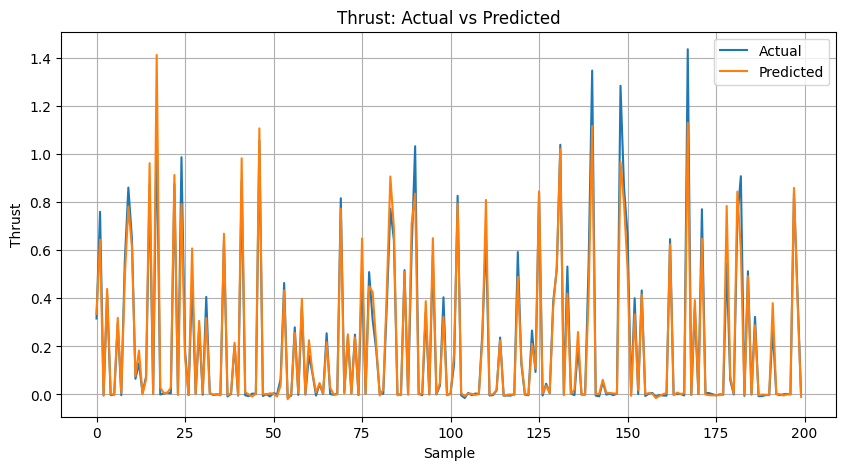

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_val.values[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.legend()
plt.title("Thrust: Actual vs Predicted")
plt.xlabel("Sample")
plt.ylabel("Thrust")
plt.grid(True)
plt.show()


In [ ]:
# step by step 
#test_data = meta[(meta['sn'] >= 13) & (meta['sn'] <= 21)] becase we not have larg RAM 

test_data = meta[(meta['sn'] >= 13) & (meta['sn'] <= 14)]
# processing data for test

all_test_frames = []

for idx, row in test_data.iterrows():
    file_path = row['full_path']
    df = process_test_file(file_path, target_column='thrust')
    if df is not None:
        all_test_frames.append(df)

df_test = pd.concat(all_test_frames, ignore_index=True)
print("Test data shape:", df_test.shape)
df_test.head()


Test data shape: (14350568, 5)


,ton,thrust,on_duration,lag_thrust_1,source_file
0,0,-0.004594,0,0.000412,C:/Users/kingGester/Desktop/data/raw/test/0126...
1,0,0.007140,0,-0.004594,C:/Users/kingGester/Desktop/data/raw/test/0126...
2,0,-0.001830,0,0.007140,C:/Users/kingGester/Desktop/data/raw/test/0126...
3,0,0.004889,0,-0.001830,C:/Users/kingGester/Desktop/data/raw/test/0126...
4,0,0.000776,0,0.004889,C:/Users/kingGester/Desktop/data/raw/test/0126...


In [34]:
X_test = df_test[['ton', 'on_duration', 'lag_thrust_1']]
y_test = df_test['thrust']

y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

print("📊 MAE (Test Set):", mean_absolute_error(y_test, y_test_pred))
print("📈 R2 Score (Test Set):", r2_score(y_test, y_test_pred))


📊 MAE (Test Set): 0.029010208011369738
📈 R2 Score (Test Set): 0.9566121812797621


In [ ]:
test_data = meta[(meta['sn'] >= 15) & (meta['sn'] <= 17)]


all_test_frames = []

for idx, row in test_data.iterrows():
    file_path = row['full_path']
    df = process_test_file(file_path, target_column='thrust')
    if df is not None:
        all_test_frames.append(df)

df_test = pd.concat(all_test_frames, ignore_index=True)
print("Test data shape:", df_test.shape)
df_test.head()


X_test = df_test[['ton', 'on_duration', 'lag_thrust_1']]
y_test = df_test['thrust']

y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

print("📊 MAE (Test Set):", mean_absolute_error(y_test, y_test_pred))
print("📈 R2 Score (Test Set):", r2_score(y_test, y_test_pred))

In [ ]:
test_data = meta[(meta['sn'] >= 18) & (meta['sn'] <= 20)]


all_test_frames = []

for idx, row in test_data.iterrows():
    file_path = row['full_path']
    df = process_test_file(file_path, target_column='thrust')
    if df is not None:
        all_test_frames.append(df)

df_test = pd.concat(all_test_frames, ignore_index=True)
print("Test data shape:", df_test.shape)
df_test.head()


X_test = df_test[['ton', 'on_duration', 'lag_thrust_1']]
y_test = df_test['thrust']

y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

print("📊 MAE (Test Set):", mean_absolute_error(y_test, y_test_pred))
print("📈 R2 Score (Test Set):", r2_score(y_test, y_test_pred))

In [ ]:
test_data = meta[(meta['sn'] >= 20) & (meta['sn'] <= 24)]


all_test_frames = []

for idx, row in test_data.iterrows():
    file_path = row['full_path']
    df = process_test_file(file_path, target_column='thrust')
    if df is not None:
        all_test_frames.append(df)

df_test = pd.concat(all_test_frames, ignore_index=True)
print("Test data shape:", df_test.shape)
df_test.head()


X_test = df_test[['ton', 'on_duration', 'lag_thrust_1']]
y_test = df_test['thrust']

y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

print("📊 MAE (Test Set):", mean_absolute_error(y_test, y_test_pred))
print("📈 R2 Score (Test Set):", r2_score(y_test, y_test_pred))
